In [1]:
from bs4 import BeautifulSoup
import requests

In [51]:
apartment_list = []
for p in range(1,35):
    url = 'https://www.apartmentlist.com/tx/houston/page-{}'.format(p)
    source = requests.get(url).text
    soup = BeautifulSoup(source, 'lxml')
    for item in soup.find_all('div', class_='css-dfx0e1 e1k7pw6k0'):
        apartment_list.append([item.a.text, item.find('div', class_='css-17xjl8p e1k7pw6k5').text])

In [54]:
import pandas as pd

In [55]:
df_apartment = pd.DataFrame(apartment_list, columns=['Apartment Name', 'Address'])
df_apartment.head(10)

,Apartment Name,Address
0,Timber Ridge,"12200 Fleming Dr, Houston, TX"
1,Montierra,"2345 Sage Rd, Houston, TX"
2,Ashton on West Dallas,"1616 W Dallas St, Houston, TX"
3,Summervale,"9221 Pagewood Ln, Houston, TX"
4,Remington Park,"5510 S Rice Ave, Houston, TX"
5,Woods on Lamonte,"4800 Lamonte Ln, Houston, TX"
6,The Gables at Richmond,"3400 Ocee St, Houston, TX"
7,Towne Lake Apartments,"5730 Timber Creek Place Dr, Houston, TX"
8,Sterling Point,"6601 Dunlap St, Houston, TX"
9,Adobe Springs,"3700 Watonga Blvd, Houston, TX"


In [93]:
df_apartment = df_apartment[~df_apartment.duplicated()]

In [94]:
df_apartment[df_apartment.duplicated(['Address'], keep=False)]

,Apartment Name,Address
199,Tuscany Court Apartments,"1901 Augusta Dr, Houston, TX"
205,Tuscany Oaks Apartments,"1901 Augusta Dr, Houston, TX"
207,Tuscany Apartments,"1100 Bering Dr, Houston, TX"
209,Tuscany Gate Apartments,"1100 Bering Dr, Houston, TX"
463,Tuscany Villas Apartments,"1100 Bering Dr, Houston, TX"


In [95]:
df_apartment.loc[205, 'Address'] = '2525 Augusta Dr, Houston, TX'
df_apartment.loc[209, 'Address'] = '1801 Bering Dr, Houston, TX'
df_apartment.loc[463, 'Address'] = '824 Bering Dr, Houston, TX'

e:\软件\python\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
e:\软件\python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
e:\软件\python\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
e:\软件\python\lib\site-packages\ipykernel

In [351]:
print(df_apartment['Apartment Name'].unique().shape, df_apartment['Address'].unique().shape)

(507,) (507,)


In [103]:
df_apartment.to_csv('Houston Apartment List', index=False)

In [104]:
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

In [353]:
geolocator = Nominatim(user_agent="Apartment_explorer")
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

Location_Object_Series = df_apartment['Address'].apply(geocode)

RateLimiter caught an error, retrying (0/2 tries). Called with (*('2411 Washington Ave, Houston, TX',), **{}).
Traceback (most recent call last):
  File "e:\软件\python\lib\site-packages\geopy\geocoders\base.py", line 355, in _call_geocoder
    page = requester(req, timeout=timeout, **kwargs)
  File "e:\软件\python\lib\urllib\request.py", line 525, in open
    response = self._open(req, data)
  File "e:\软件\python\lib\urllib\request.py", line 543, in _open
    '_open', req)
  File "e:\软件\python\lib\urllib\request.py", line 503, in _call_chain
    result = func(*args)
  File "e:\软件\python\lib\urllib\request.py", line 1360, in https_open
    context=self._context, check_hostname=self._check_hostname)
  File "e:\软件\python\lib\urllib\request.py", line 1320, in do_open
    r = h.getresponse()
  File "e:\软件\python\lib\http\client.py", line 1336, in getresponse
    response.begin()
  File "e:\软件\python\lib\http\client.py", line 306, in begin
    version, status, reason = self._read_status()
  File

In [354]:
Location_Object_Series.isna().sum()

19

In [355]:
Location_Object_Series[Location_Object_Series.isna()]

44     None
48     None
81     None
82     None
95     None
105    None
118    None
136    None
186    None
225    None
245    None
247    None
286    None
328    None
343    None
360    None
390    None
411    None
434    None
Name: Address, dtype: object

In [356]:
df_apartment['Latitude'] = Location_Object_Series.apply(lambda x: x.latitude if x else None)
df_apartment['Longitude'] = Location_Object_Series.apply(lambda x: x.longitude if x else None)
df_apartment.head()

,Apartment Name,Address,Latitude,Longitude
0,Timber Ridge,"12200 Fleming Dr, Houston, TX",29.775678,-95.220987
1,Montierra,"2345 Sage Rd, Houston, TX",29.743883,-95.466360
2,Ashton on West Dallas,"1616 W Dallas St, Houston, TX",29.758375,-95.383325
3,Summervale,"9221 Pagewood Ln, Houston, TX",29.725929,-95.527784
4,Remington Park,"5510 S Rice Ave, Houston, TX",29.722547,-95.468239


In [357]:
df_apartment[df_apartment['Latitude'].isna()]

,Apartment Name,Address,Latitude,Longitude
44,Pebble Creek,"10803 Greencreek Dr, Houston, TX",NaN,NaN
48,Crossing at White Oak,"2424 E TC Jester Blvd, Houston, TX",NaN,NaN
81,Domain West,"611 Dairy Ashford Rd, Houston, TX",NaN,NaN
82,Montelago,"11881 Gulf Pointe Dr, Houston, TX",NaN,NaN
95,Southpoint,"12801 Roydon Dr, Houston, TX",NaN,NaN
105,District at Washington,"230 TC Jester Blvd, Houston, TX",NaN,NaN
118,Broadstone Energy Park,"880 Highway 6 S, Houston, TX",NaN,NaN
136,The Gardens Apartments,"1660 W TC Jester Blvd, Houston, TX",NaN,NaN
186,The Terraces on Brompton,"7315 Brompton St, Houston, TX",NaN,NaN
225,City Park,"1640 E TC Jester Blvd, Houston, TX",NaN,NaN


In [358]:
df_apartment = df_apartment.dropna(axis=0).reset_index(drop=True)

In [373]:
df_apartment = df_apartment[~((df_apartment['Latitude']>30.131527)|(df_apartment['Longitude']>-95.044849))]

In [383]:
df_apartment = df_apartment[~(df_apartment['Longitude']<-95.794025)]

In [384]:
df_apartment.shape

(469, 4)

In [375]:
address = 'Houston, TX, USA'
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Houston are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Houston are 29.7589382, -95.3676974.


In [194]:
import folium

In [385]:
houston_map = folium.Map(location=[latitude, longitude], zoom_start=10)

for name, lat, lng in zip(df_apartment['Apartment Name'], df_apartment['Latitude'], df_apartment['Longitude']):
    folium.CircleMarker(
        [lat, lng],
        popup=name,
        radius=3,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7).add_to(houston_map)

houston_map

In [386]:
CLIENT_ID = '1D0VDVL40FGS5PIAWB3JCBXHNUXXALOC3RXJF24KO5MZZOL0'
CLIENT_SECRET = 'H150LZX3EHN1PIOHUQ45KP43PVVIGBXT1FC14X12SUO5DVQF'
VERSION = 20200401
RADIUS = 750
LIMIT = 100

In [387]:
venue_list = []
for name, lat, lng in zip(df_apartment['Apartment Name'], df_apartment['Latitude'], df_apartment['Longitude']):

    url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, RADIUS, LIMIT)
    results = requests.get(url).json()['response']['groups'][0]['items']
    
    for v in results:
        venue_list.append([name, v['venue']['name'], v['venue']['categories'][0]['name'],
                           v['venue']['location']['lat'], v['venue']['location']['lng']])

df_venues = pd.DataFrame(venue_list)
df_venues.columns = ['Apartment', 'Venue', 'Venue Category', 'Venue Latitude', 'Venue Longitude']
df_venues.head()

,Apartment,Venue,Venue Category,Venue Latitude,Venue Longitude
0,Timber Ridge,Burlington,Department Store,29.772452,-95.223958
1,Timber Ridge,Mambo Seafood,Seafood Restaurant,29.771058,-95.219425
2,Timber Ridge,Pappa's Bar B Q,BBQ Joint,29.769890,-95.217170
3,Timber Ridge,Dot Coffee Shop,Diner,29.770531,-95.224447
4,Timber Ridge,SUBWAY,Sandwich Place,29.771802,-95.215071


In [388]:
df_venues.shape

(15909, 5)

In [389]:
df_venues_grouped = df_venues.groupby('Apartment')
venue_count = df_venues_grouped.count()[['Venue']].rename(columns={'Venue':'Venue Count'})
venue_count.index.rename('Apartment Name', inplace=True)
venue_count.head()

,Venue Count
Apartment Name,
1300 North Post Oak,6
1624 Holman St,43
1900 Yorktown,21
1901 Richmond Ave,80
1919 Portsmouth St,73


In [390]:
venue_count.describe()

,Venue Count
count,469.000000
mean,33.921109
std,26.119142
min,1.000000
25%,12.000000
50%,26.000000
75%,51.000000
max,100.000000


In [246]:
from matplotlib import pyplot as plt

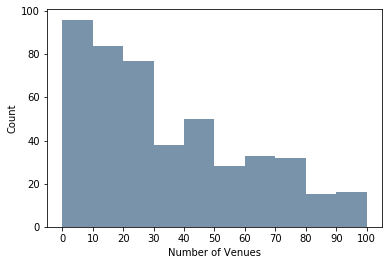

In [395]:
BinEdge = np.linspace(0, 100, 11)
plt.hist(venue_count['Venue Count'], bins=BinEdge, color='#7993ab')

plt.xticks(BinEdge)
plt.xlabel('Number of Venues')
plt.ylabel('Count')

plt.savefig('bar chart', dpi=300)
plt.show()

In [396]:
df_apartment = df_apartment.join(venue_count, on='Apartment Name')
df_apartment.head()

,Apartment Name,Address,Latitude,Longitude,Venue Count
0,Timber Ridge,"12200 Fleming Dr, Houston, TX",29.775678,-95.220987,23
1,Montierra,"2345 Sage Rd, Houston, TX",29.743883,-95.466360,88
2,Ashton on West Dallas,"1616 W Dallas St, Houston, TX",29.758375,-95.383325,19
3,Summervale,"9221 Pagewood Ln, Houston, TX",29.725929,-95.527784,17
4,Remington Park,"5510 S Rice Ave, Houston, TX",29.722547,-95.468239,30


In [398]:
df_apartment['Venue Count'].isna().any()

False

In [271]:
from matplotlib import cm
from matplotlib import colors

In [400]:
colors_array = cm.coolwarm(df_apartment['Venue Count']/100)
colors_list = [colors.rgb2hex(i) for i in colors_array]

In [401]:
houston_map = folium.Map(location=[latitude, longitude], zoom_start=10)

for name, lat, lng, c in zip(df_apartment['Apartment Name'], df_apartment['Latitude'], df_apartment['Longitude'], colors_list):
    folium.CircleMarker(
        [lat, lng],
        popup=name,
        radius=3,
        color=c,
        fill=True,
        fill_color=c,
        fill_opacity=0.7).add_to(houston_map)

houston_map

In [402]:
df_venue_dummies = pd.get_dummies(df_venues['Venue Category'])
df_venue_dummies.insert(0, 'Apartment Name', df_venues['Apartment'])
df_venue_dummies.head()

,Apartment Name,ATM,Accessories Store,Adult Boutique,Advertising Agency,Afghan Restaurant,African Restaurant,Airport,Airport Service,American Restaurant,...,Volleyball Court,Warehouse Store,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo
0,Timber Ridge,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Timber Ridge,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Timber Ridge,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Timber Ridge,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Timber Ridge,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [403]:
df_dummy_grouped = df_venue_dummies.groupby('Apartment Name').mean()
df_dummy_grouped.head()

,ATM,Accessories Store,Adult Boutique,Advertising Agency,Afghan Restaurant,African Restaurant,Airport,Airport Service,American Restaurant,Antique Shop,...,Volleyball Court,Warehouse Store,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo
Apartment Name,,,,,,,,,,,,,,,,,,,,,
1300 North Post Oak,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
1624 Holman St,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.046512,0.0,...,0.0,0.0,0.0,0.0,0.023256,0.0,0.0,0.0,0.000000,0.0
1900 Yorktown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
1901 Richmond Ave,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.012500,0.0
1919 Portsmouth St,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.013699,0.0


In [404]:
top10_list=[]
for ind, row in df_dummy_grouped.iterrows():
    row_sorted = row.sort_values(ascending=False)
    row_sorted = row_sorted[row_sorted!=0]
    if len(row_sorted)>=10:
        top10_list.append([ind] + list(row_sorted[:10].index))
    else:
        top10_list.append([ind] + list(row_sorted.index))
        
df_top10 = pd.DataFrame(top10_list)

col_names = ['Apartment Name']
temp = ['st', 'nd', 'rd'] + ['th']*7
for i in range(10):
    col_names.append('{}{} Most Common Venue'.format(i+1, temp[i]))
    
df_top10.columns = col_names
df_top10.head()

,Apartment Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1300 North Post Oak,Gym / Fitness Center,Coffee Shop,Pool,American Restaurant,Pizza Place,Dry Cleaner,None,None,None,None
1,1624 Holman St,Coffee Shop,Bar,Bakery,Nightclub,American Restaurant,Gas Station,Park,Bookstore,Sandwich Place,Café
2,1900 Yorktown,Bank,Park,Gym / Fitness Center,Chinese Restaurant,Mexican Restaurant,Shipping Store,Bakery,Sandwich Place,Gym,Athletics & Sports
3,1901 Richmond Ave,Park,Food Truck,Mexican Restaurant,Sandwich Place,Pizza Place,Coffee Shop,Pub,Italian Restaurant,Thai Restaurant,Record Shop
4,1919 Portsmouth St,Park,Mexican Restaurant,Food Truck,Seafood Restaurant,Bookstore,Pizza Place,Pub,Coffee Shop,Record Shop,Café


In [287]:
from sklearn.cluster import KMeans

In [407]:
k = 5
k_means = KMeans(n_clusters=k, n_init=12)
k_means.fit(df_dummy_grouped)
k_means.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2,
       2, 3, 0, 3, 2, 0, 2, 2, 2, 2, 3, 3, 2, 2, 2, 4, 2, 3, 2, 3, 2, 0,
       4, 2, 4, 3, 3, 2, 0, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 3, 0, 4, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 0, 2, 2, 2, 3, 2, 0, 2, 2, 3, 0, 0, 2, 3, 2, 2, 0, 2, 2,
       2, 3, 0, 2, 2, 0, 2, 3, 0, 2, 3, 0, 0, 2, 2, 2, 3, 2, 3, 3, 3, 2,
       2, 2, 0, 0, 2, 2, 0, 3, 2, 2, 3, 2, 2, 2, 2, 0, 0, 2, 2, 2, 3, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 3, 2, 3, 0, 2, 2, 0, 0, 2, 2, 3, 2, 2, 2, 2, 0, 2, 0, 3, 3, 0,
       0, 0, 2, 0, 2, 2, 3, 0, 2, 2, 3, 3, 0, 2, 3, 2, 2, 3, 3, 0, 3, 2,
       2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 0, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 0, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2,
       2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 3, 0, 3, 0, 4, 3, 0, 3, 2, 2, 2, 2,
       3, 3, 3, 4, 4, 4, 4, 4, 0, 0, 4, 2, 3, 2, 2,

In [408]:
df_top10.insert(1, 'Cluster Label', k_means.labels_)
df_top10.head()

,Apartment Name,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1300 North Post Oak,2,Gym / Fitness Center,Coffee Shop,Pool,American Restaurant,Pizza Place,Dry Cleaner,None,None,None,None
1,1624 Holman St,2,Coffee Shop,Bar,Bakery,Nightclub,American Restaurant,Gas Station,Park,Bookstore,Sandwich Place,Café
2,1900 Yorktown,2,Bank,Park,Gym / Fitness Center,Chinese Restaurant,Mexican Restaurant,Shipping Store,Bakery,Sandwich Place,Gym,Athletics & Sports
3,1901 Richmond Ave,2,Park,Food Truck,Mexican Restaurant,Sandwich Place,Pizza Place,Coffee Shop,Pub,Italian Restaurant,Thai Restaurant,Record Shop
4,1919 Portsmouth St,2,Park,Mexican Restaurant,Food Truck,Seafood Restaurant,Bookstore,Pizza Place,Pub,Coffee Shop,Record Shop,Café


In [411]:
df_combined = df_apartment.join(df_top10.set_index('Apartment Name'), on='Apartment Name')
df_combined.head()

,Apartment Name,Address,Latitude,Longitude,Venue Count,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Timber Ridge,"12200 Fleming Dr, Houston, TX",29.775678,-95.220987,23,0,Seafood Restaurant,Fast Food Restaurant,Fried Chicken Joint,Mexican Restaurant,Men's Store,Grocery Store,BBQ Joint,Sandwich Place,Gym,Clothing Store
1,Montierra,"2345 Sage Rd, Houston, TX",29.743883,-95.466360,88,2,Hotel,Sandwich Place,New American Restaurant,American Restaurant,Department Store,Jewelry Store,Health & Beauty Service,Burger Joint,Sporting Goods Shop,Hotel Bar
2,Ashton on West Dallas,"1616 W Dallas St, Houston, TX",29.758375,-95.383325,19,2,Pub,Vegetarian / Vegan Restaurant,Bar,Gay Bar,Park,Café,Dry Cleaner,Gym,Auto Garage,River
3,Summervale,"9221 Pagewood Ln, Houston, TX",29.725929,-95.527784,17,3,Nightclub,South American Restaurant,Liquor Store,Furniture / Home Store,Gourmet Shop,Caribbean Restaurant,Ethiopian Restaurant,Latin American Restaurant,Taco Place,Mexican Restaurant
4,Remington Park,"5510 S Rice Ave, Houston, TX",29.722547,-95.468239,30,0,Fast Food Restaurant,Hotel,Furniture / Home Store,Pool,Health & Beauty Service,Electronics Store,Big Box Store,Grocery Store,Coffee Shop,Gym


In [412]:
colors_array_2 = cm.rainbow(np.linspace(0, 1, k))
colors_list_2 = [colors.rgb2hex(i) for i in colors_array_2]

In [413]:
houston_map = folium.Map(location=[latitude, longitude], zoom_start=10)

for apt, label, lat, lng in zip(df_combined['Apartment Name'], df_combined['Cluster Label'],
                          df_combined['Latitude'], df_combined['Longitude']):
    folium.CircleMarker(
        [lat, lng],
        popup=apt+' Cluster '+str(label),
        radius=3,
        color=colors_list_2[label],
        fill=True,
        fill_color=colors_list_2[label],
        fill_opacity=0.7).add_to(houston_map)

houston_map

In [414]:
df_combined.loc[df_combined['Cluster Label']==0].iloc[:, [0]+list(range(6,16))]

,Apartment Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Timber Ridge,Seafood Restaurant,Fast Food Restaurant,Fried Chicken Joint,Mexican Restaurant,Men's Store,Grocery Store,BBQ Joint,Sandwich Place,Gym,Clothing Store
4,Remington Park,Fast Food Restaurant,Hotel,Furniture / Home Store,Pool,Health & Beauty Service,Electronics Store,Big Box Store,Grocery Store,Coffee Shop,Gym
16,The Preakness,Fast Food Restaurant,Bank,Mobile Phone Shop,Mexican Restaurant,Rental Car Location,Sandwich Place,Tex-Mex Restaurant,Buffet,Restaurant,Chinese Restaurant
17,La Casita,Furniture / Home Store,Mexican Restaurant,Music Venue,Fast Food Restaurant,Sandwich Place,Gas Station,Video Store,Mattress Store,None,None
33,Lakeshore,Fast Food Restaurant,Vietnamese Restaurant,Spa,Pharmacy,Mexican Restaurant,Shipping Store,Restaurant,Bank,Tea Room,Sandwich Place
...,...,...,...,...,...,...,...,...,...,...,...
466,Ten Pines,Fast Food Restaurant,Department Store,Clothing Store,Italian Restaurant,Sporting Goods Shop,Miscellaneous Shop,Burger Joint,Mexican Restaurant,Gas Station,Shipping Store
467,Watermarke Apartment Homes,Fast Food Restaurant,Mexican Restaurant,Furniture / Home Store,Chinese Restaurant,Sandwich Place,Clothing Store,Video Game Store,Paper / Office Supplies Store,Cajun / Creole Restaurant,Gas Station
468,Hunter's Point Apartment Homes,Mexican Restaurant,Furniture / Home Store,Fast Food Restaurant,Restaurant,Fried Chicken Joint,Breakfast Spot,Thai Restaurant,Donut Shop,Mobile Phone Shop,Bar
470,Victory Apartments,Mexican Restaurant,Fast Food Restaurant,Discount Store,Snack Place,Bakery,Chinese Restaurant,Sandwich Place,Optical Shop,Taco Place,Smoke Shop


In [415]:
df_combined.loc[df_combined['Cluster Label']==1].iloc[:, [0]+list(range(6,16))]

,Apartment Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
95,Windmill Landing,Business Service,None,None,None,None,None,None,None,None,None


In [416]:
df_combined.loc[df_combined['Cluster Label']==2].iloc[:, [0]+list(range(6,16))]

,Apartment Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Montierra,Hotel,Sandwich Place,New American Restaurant,American Restaurant,Department Store,Jewelry Store,Health & Beauty Service,Burger Joint,Sporting Goods Shop,Hotel Bar
2,Ashton on West Dallas,Pub,Vegetarian / Vegan Restaurant,Bar,Gay Bar,Park,Café,Dry Cleaner,Gym,Auto Garage,River
5,Woods on Lamonte,Dog Run,Dive Bar,Bar,Bank,Sandwich Place,Furniture / Home Store,Park,Grocery Store,Thrift / Vintage Store,Storage Facility
9,Adobe Springs,Dog Run,Dive Bar,Fried Chicken Joint,Pet Store,Mexican Restaurant,Storage Facility,Furniture / Home Store,Bar,Bank,Grocery Store
10,Harvest Hill,Rental Car Location,Pizza Place,Indian Restaurant,Smoke Shop,Grocery Store,Liquor Store,Baseball Stadium,Gas Station,Men's Store,Moving Target
...,...,...,...,...,...,...,...,...,...,...,...
480,1901 Richmond Ave,Park,Food Truck,Mexican Restaurant,Sandwich Place,Pizza Place,Coffee Shop,Pub,Italian Restaurant,Thai Restaurant,Record Shop
483,1624 Holman St,Coffee Shop,Bar,Bakery,Nightclub,American Restaurant,Gas Station,Park,Bookstore,Sandwich Place,Café
484,219 W Alabama,Coffee Shop,Beer Garden,Grocery Store,French Restaurant,Spa,Bar,Concert Hall,Breakfast Spot,Taco Place,Gas Station
486,Crossings at Berkley Square,Cosmetics Shop,Grocery Store,Café,Liquor Store,Gym,BBQ Joint,Tennis Court,Bank,Salon / Barbershop,Sandwich Place


In [417]:
df_combined.loc[df_combined['Cluster Label']==3].iloc[:, [0]+list(range(6,16))]

,Apartment Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Summervale,Nightclub,South American Restaurant,Liquor Store,Furniture / Home Store,Gourmet Shop,Caribbean Restaurant,Ethiopian Restaurant,Latin American Restaurant,Taco Place,Mexican Restaurant
6,The Gables at Richmond,South American Restaurant,Indian Restaurant,Latin American Restaurant,Fried Chicken Joint,Nightclub,Gourmet Shop,Caribbean Restaurant,Liquor Store,Ethiopian Restaurant,Food Truck
7,Towne Lake Apartments,Mexican Restaurant,Donut Shop,Bar,Seafood Restaurant,Cosmetics Shop,Movie Theater,Tennis Court,Bakery,Taco Place,Gas Station
8,Sterling Point,Mobile Phone Shop,Mexican Restaurant,Grocery Store,Sandwich Place,Asian Restaurant,Gas Station,Pharmacy,Building,Seafood Restaurant,Fried Chicken Joint
11,Arbor On Richmond,South American Restaurant,Indian Restaurant,Latin American Restaurant,Fried Chicken Joint,Nightclub,Gourmet Shop,Caribbean Restaurant,Liquor Store,Ethiopian Restaurant,Food Truck
...,...,...,...,...,...,...,...,...,...,...,...
476,2403 Southmore,Mexican Restaurant,Discount Store,Asian Restaurant,Sandwich Place,Pharmacy,Ice Cream Shop,Butcher,Supermarket,Convenience Store,Pizza Place
477,4917 Brady,Light Rail Station,Bar,Taco Place,Mattress Store,Gas Station,Fast Food Restaurant,Pharmacy,Mexican Restaurant,Video Store,Miscellaneous Shop
481,Tierwester Village,Burger Joint,Auto Workshop,Convenience Store,Food,Discount Store,None,None,None,None,None
482,Garden Oaks,BBQ Joint,Fried Chicken Joint,Gym / Fitness Center,Grocery Store,Convenience Store,Liquor Store,Light Rail Station,Flea Market,History Museum,None


In [418]:
df_combined.loc[df_combined['Cluster Label']==4].iloc[:, [0]+list(range(6,16))]

,Apartment Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
24,The Millennium Kirby,Gym,Sandwich Place,Park,Soccer Field,None,None,None,None,None,None
34,Breckenridge,Gas Station,Wine Bar,Clothing Store,Discount Store,Plaza,Park,Cosmetics Shop,None,None,None
38,Parc at 505,Park,Furniture / Home Store,Gas Station,Burger Joint,None,None,None,None,None,None
106,San Paloma,Park,Cosmetics Shop,Playground,Bus Station,Home Service,None,None,None,None,None
208,Westbury Crossing,Discount Store,Grocery Store,Mexican Restaurant,Park,Bar,Gas Station,None,None,None,None
273,Rockridge Bend,Park,Wine Bar,Clothing Store,Discount Store,Plaza,Gas Station,Cosmetics Shop,None,None,None
280,Salado,Gym,Print Shop,Park,Clothing Store,None,None,None,None,None,None
294,Rockridge Springs,Park,Wine Bar,Clothing Store,Discount Store,Plaza,Gas Station,Cosmetics Shop,None,None,None
295,Rockridge Commons,Park,Cosmetics Shop,Wine Bar,Hotel,Plaza,Discount Store,Clothing Store,Gas Station,None,None
297,Amherst at CityView,Park,Hotel,Shipping Store,Cosmetics Shop,Discount Store,Clothing Store,Breakfast Spot,Gas Station,Wine Bar,Plaza
